In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/home/azhar04/project/1. dev/quantum-dev/ShotOptimized-ADAPT-VQE/2-Shot-ADAPT-VQE/')
print(sys.executable)

/home/azhar04/anaconda3/envs/qiskit-1-2/bin/python


## H2

In [75]:
from src.pools import QE
from src.molecules import create_h2, create_h3

from algorithms.adapt_vqe import AdaptVQE

r = 0.742
molecule = create_h2(r)
pool = QE(molecule)

adapt_vqe = AdaptVQE(pool=pool,
                    molecule=molecule,
                    max_adapt_iter=3,
                    max_opt_iter=100,
                    grad_threshold=10**-5,
                    vrb=True
                    )

# print(pool)
adapt_vqe.run()


. . . ======= Start Run ADAPT-VQE ======= . . .

 # Initialize Data 
	Initial Energy =  -1.1166512474115222

. . . ======= ADAPT-VQE Iteration 1 ======= . . .

 # Active Circuit at Adapt iteration 1:
           ░ 
q_3: ──────░─
           ░ 
q_2: ──────░─
     ┌───┐ ░ 
q_1: ┤ X ├─░─
     ├───┤ ░ 
q_0: ┤ X ├─░─
     └───┘ ░ 

 # Rank Gradients (Pool size = 4)

	Evaluating Gradient 0
		value = 0.0

	Evaluating Gradient 1
		value = 0.0

	Evaluating Gradient 2
		value = 0.3626448111291864
		total norm = 0.13151125903892327 ✅

	Evaluating Gradient 3
		value = 0.0

 # Gradient Rank Total Results

	Total gradient norm: 0.3626448111291864
	Final Selected Indices: [2]
	Final Selected Gradients: [array(0.36264481)]
	Is Finished? -> False

 # Grow and Update Ansatz
	Grow ansatz with parameter coefficients: []
		self.coefficients []
		self.indices []
		self.coefficients <class 'list'>
		self.indices <class 'list'>
		self.coefficients updated [0.]
		self.indices updated [2]
	Operator(s) added to a

[array(-1.11665125), -1.1372633190524875, -1.1372633055362333, -1.1372633282362712]


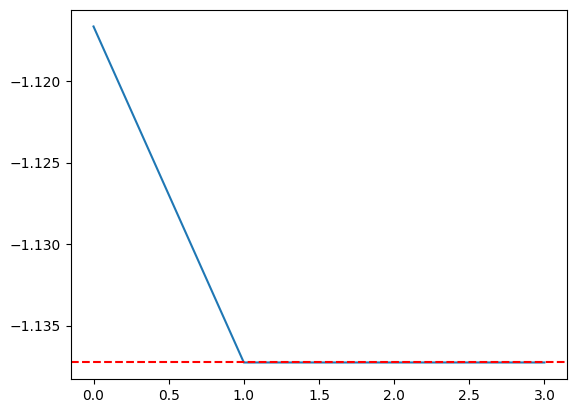

In [76]:
import matplotlib.pyplot as plt

data = adapt_vqe.data
energies = []
energies.append(data.initial_energy)

for i in range(len(data.evolution.its_data)):
    energy = data.evolution.its_data[i].energy
    energies.append(energy)

print(energies)
plt.plot(energies)
plt.axhline(y=data.fci_energy, color='r', linestyle='--')

In [61]:
data = adapt_vqe.data

print(data.__dict__)

print(data.pool_name)
print(data.evolution.__dict__)

print("Iteration Data: ", data.evolution.its_data[0].energy)

print(data.result.__dict__)

{'pool_name': 'QE', 'initial_energy': array(-1.11665125), 'initial_error': 0.020612090952013107, 'sparse_ref_state': None, 'evolution': <algorithms.adapt_data.EvolutionData object at 0x7f15b09edd30>, 'file_name': None, 'iteration_counter': 3, 'fci_energy': -1.1372633383635353, 'n': 4, 'closed': True, 'success': False, 'result': <algorithms.adapt_data.IterationData object at 0x7f15b0d8eb70>}
QE
{'initial_energy': array(-1.11665125), 'its_data': [<algorithms.adapt_data.IterationData object at 0x7f15b0aa80e0>, <algorithms.adapt_data.IterationData object at 0x7f15b09ec9b0>, <algorithms.adapt_data.IterationData object at 0x7f15b0d8eb70>]}
Iteration Data:  -1.1372633190524875
{'ansatz': <algorithms.adapt_data.AnsatzData object at 0x7f15b0b5fb60>, 'energy': -1.1372633282362712, 'energy_change': -2.270003784943242e-08, 'error': 1.0127264138404257e-08, 'gradient_norm': 0.0004606023018721289, 'sel_gradients': array([0.0004606]), 'inv_hessian': array([3.62644811e-01, 3.53273795e-04, 4.60602302e-0

[array(-1.50189761), -1.514941802057279, -1.5222752561122608, -1.5246950932741905, -1.524695076047346, -1.5246950690869392, -1.5246950466427915, -1.5246950914271757, -1.524695038296309, -1.5246950890032098, -1.5246950972842737]


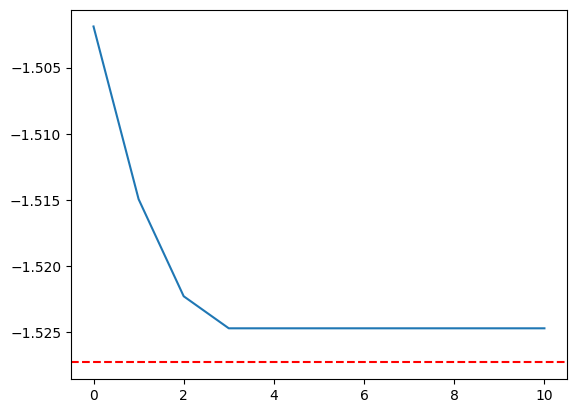

In [74]:
import matplotlib.pyplot as plt

data = adapt_vqe.data
energies = []
energies.append(data.initial_energy)

for i in range(len(data.evolution.its_data)):
    energy = data.evolution.its_data[i].energy
    energies.append(energy)

print(energies)
plt.plot(energies)
plt.axhline(y=data.fci_energy, color='r', linestyle='--')

In [53]:

# Access the final ansatz indices and coefficients
print("Evolution of ansatz indices: ", data.evolution.indices)
print(
    "Final operators in the ansatz: ",
    [pool.get_op(index) for index in data.result.ansatz.indices],
)
print("Evolution of ansatz coefficients: ", data.evolution.coefficients)

# Access the number of function evaluations, gradient evaluations, optimizer iterations for each ADAPT-VQE iteration
print("Function evaluations throughout the iterations:", data.evolution.nfevs)
print("Gradient evaluations throughout the iterations:", data.evolution.ngevs)
print("Optimizer iterations throughout the iterations:", data.evolution.nits)



Evolution of ansatz indices:  [[2], [2, 2], [2, 2, 2]]
Final operators in the ansatz:  [-0.125j [X0 X1 X2 Y3] +
-0.125j [X0 X1 Y2 X3] +
0.125j [X0 Y1 X2 X3] +
-0.125j [X0 Y1 Y2 Y3] +
0.125j [Y0 X1 X2 X3] +
-0.125j [Y0 X1 Y2 Y3] +
0.125j [Y0 Y1 X2 Y3] +
0.125j [Y0 Y1 Y2 X3], -0.125j [X0 X1 X2 Y3] +
-0.125j [X0 X1 Y2 X3] +
0.125j [X0 Y1 X2 X3] +
-0.125j [X0 Y1 Y2 Y3] +
0.125j [Y0 X1 X2 X3] +
-0.125j [Y0 X1 Y2 Y3] +
0.125j [Y0 Y1 X2 Y3] +
0.125j [Y0 Y1 Y2 X3], -0.125j [X0 X1 X2 Y3] +
-0.125j [X0 X1 Y2 X3] +
0.125j [X0 Y1 X2 X3] +
-0.125j [X0 Y1 Y2 Y3] +
0.125j [Y0 X1 X2 X3] +
-0.125j [Y0 X1 Y2 Y3] +
0.125j [Y0 Y1 X2 Y3] +
0.125j [Y0 Y1 Y2 X3]]
Evolution of ansatz coefficients:  [array([0.11308125]), array([ 0.11328751, -0.00023947]), array([ 1.13452834e-01, -3.29142146e-06, -1.79795506e-04])]
Function evaluations throughout the iterations: [[], [], []]
Gradient evaluations throughout the iterations: [[], [], []]
Optimizer iterations throughout the iterations: [None, None, None]


## H3

In [77]:
from src.pools import QE
from src.molecules import create_h2, create_h3

from algorithms.adapt_vqe import AdaptVQE

r = 0.742
molecule = create_h3(r)
pool = QE(molecule)

adapt_vqe = AdaptVQE(pool=pool,
                    molecule=molecule,
                    max_adapt_iter=20,
                    max_opt_iter=100,
                    grad_threshold=10**-1,
                    vrb=True
                    )

# print(pool)
adapt_vqe.run()


. . . ======= Start Run ADAPT-VQE ======= . . .

 # Initialize Data 
	Initial Energy =  -1.50189761444302

. . . ======= ADAPT-VQE Iteration 1 ======= . . .

 # Active Circuit at Adapt iteration 1:
           ░ 
q_5: ──────░─
           ░ 
q_4: ──────░─
           ░ 
q_3: ──────░─
     ┌───┐ ░ 
q_2: ┤ X ├─░─
     ├───┤ ░ 
q_1: ┤ X ├─░─
     ├───┤ ░ 
q_0: ┤ X ├─░─
     └───┘ ░ 

 # Rank Gradients (Pool size = 24)

	Evaluating Gradient 0
		value = 0.0

	Evaluating Gradient 1
		value = -0.13320603644720624
		total norm = 0.017743848145974437 ✅

	Evaluating Gradient 2
		value = 0.0

	Evaluating Gradient 3
		value = -0.13320601823227102
		total norm = 0.03548769143927055 ✅

	Evaluating Gradient 4
		value = 0.0

	Evaluating Gradient 5
		value = 0.0

	Evaluating Gradient 6
		value = 0.0

	Evaluating Gradient 7
		value = 0.0

	Evaluating Gradient 8
		value = 0.0

	Evaluating Gradient 9
		value = 0.0

	Evaluating Gradient 10
		value = 0.0

	Evaluating Gradient 11
		value = 0.0

	Evaluating Gra

[array(-1.50189761), -1.514941802057279, -1.5222752561122608, -1.5246950932741905, -1.524695076047346, -1.5246950690869392, -1.5246950466427915, -1.5246950914271757, -1.524695038296309, -1.5246950890032098, -1.5246950972842737, -1.5246950881328125, -1.5246950764706582, -1.524695072759691, -1.5246950944200586, -1.5246950905430345, -1.5246950320024533, -1.5246950927832803, -1.524694973959381, -1.5246949826530143, -1.5246951054766287]


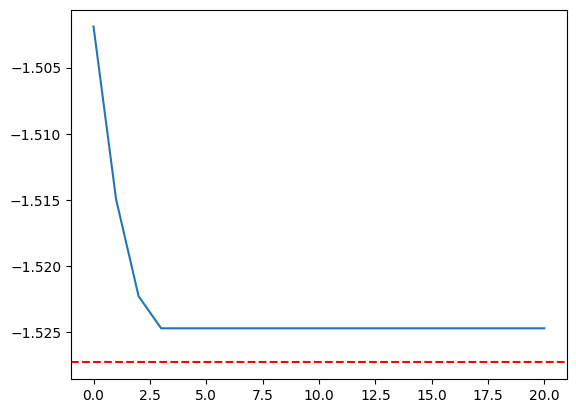

In [78]:
import matplotlib.pyplot as plt

data = adapt_vqe.data
energies = []
energies.append(data.initial_energy)

for i in range(len(data.evolution.its_data)):
    energy = data.evolution.its_data[i].energy
    energies.append(energy)

print(energies)
plt.plot(energies)
plt.axhline(y=data.fci_energy, color='r', linestyle='--')

In [72]:
print(data.fci_energy)

-1.5272758204764467


In [37]:
data = adapt_vqe.data

print(data.__dict__)

print(data.pool_name)
print(data.evolution.__dict__)

{'pool_name': 'QE', 'initial_energy': array(-1.50189761), 'initial_error': 0.025378206033426665, 'sparse_ref_state': None, 'evolution': <algorithms.adapt_data.EvolutionData object at 0x7f15b0b38b00>, 'file_name': None, 'iteration_counter': 5, 'fci_energy': -1.5272758204764467, 'n': 6, 'closed': True, 'success': False, 'result': <algorithms.adapt_data.IterationData object at 0x7f1541278a40>}
QE
{'initial_energy': array(-1.50189761), 'its_data': [<algorithms.adapt_data.IterationData object at 0x7f15b0b207a0>, <algorithms.adapt_data.IterationData object at 0x7f15b0dd26c0>, <algorithms.adapt_data.IterationData object at 0x7f1576544110>, <algorithms.adapt_data.IterationData object at 0x7f15b0c8daf0>, <algorithms.adapt_data.IterationData object at 0x7f1541278a40>]}


## LiH

In [80]:
from src.pools import QE
from src.molecules import create_h2, create_h3, create_lih

from algorithms.adapt_vqe import AdaptVQE

r = 1.542
molecule = create_lih(r)
pool = QE(molecule)

adapt_vqe = AdaptVQE(pool=pool,
                    molecule=molecule,
                    max_adapt_iter=20,
                    max_opt_iter=100,
                    grad_threshold=10**-1,
                    vrb=True
                    )

# print(pool)
adapt_vqe.run()


. . . ======= Start Run ADAPT-VQE ======= . . .

 # Initialize Data 
	Initial Energy =  -7.8631862183902745

. . . ======= ADAPT-VQE Iteration 1 ======= . . .

 # Active Circuit at Adapt iteration 1:
            ░ 
q_11: ──────░─
            ░ 
q_10: ──────░─
            ░ 
 q_9: ──────░─
            ░ 
 q_8: ──────░─
            ░ 
 q_7: ──────░─
            ░ 
 q_6: ──────░─
            ░ 
 q_5: ──────░─
            ░ 
 q_4: ──────░─
      ┌───┐ ░ 
 q_3: ┤ X ├─░─
      ├───┤ ░ 
 q_2: ┤ X ├─░─
      ├───┤ ░ 
 q_1: ┤ X ├─░─
      ├───┤ ░ 
 q_0: ┤ X ├─░─
      └───┘ ░ 

 # Rank Gradients (Pool size = 570)

	Evaluating Gradient 0
		value = 0.0

	Evaluating Gradient 1
		value = 5.884416044710239e-11

	Evaluating Gradient 2
		value = 0.0

	Evaluating Gradient 3
		value = 0.0

	Evaluating Gradient 4
		value = -2.2042517117126792e-11

	Evaluating Gradient 5
		value = 0.0

	Evaluating Gradient 6
		value = -5.884412228318592e-11

	Evaluating Gradient 7
		value = 0.0

	Evaluating Gradient 8
		

KeyboardInterrupt: 